# Find information about your ArcGIS Online Organization

In [2]:
from arcgis.gis import GIS
from getpass import getpass
password = getpass()

········


In [3]:
online_gis = GIS("https://esridenver.maps.arcgis.com", "pgamberg@EsriDenver", password)
print("Connected to {}".format(online_gis.properties.urlKey))

Connected to esridenver


## Portal properties

In [4]:
for svc, url in online_gis.properties.helperServices.items():
    if isinstance(url, list):
        print("{}\n\t{}".format(svc, url[0]['url']))
    elif isinstance(url, dict):
        print("{}\n\t{}".format(svc, url['url']))

asyncClosestFacility
	https://logistics.arcgis.com/arcgis/rest/services/World/ClosestFacility/GPServer/FindClosestFacilities
asyncLocationAllocation
	https://logistics.arcgis.com/arcgis/rest/services/World/LocationAllocation/GPServer
asyncODCostMatrix
	https://logistics.arcgis.com/arcgis/rest/services/World/OriginDestinationCostMatrix/GPServer
asyncRoute
	https://logistics.arcgis.com/arcgis/rest/services/World/Route/GPServer
asyncServiceArea
	https://logistics.arcgis.com/arcgis/rest/services/World/ServiceAreas/GPServer/GenerateServiceAreas
asyncVRP
	https://logistics.arcgis.com/arcgis/rest/services/World/VehicleRoutingProblem/GPServer/SolveVehicleRoutingProblem
closestFacility
	https://route.arcgis.com/arcgis/rest/services/World/ClosestFacility/NAServer/ClosestFacility_World
defaultElevationLayers
	https://elevation3d.arcgis.com/arcgis/rest/services/WorldElevation3D/Terrain3D/ImageServer
elevation
	https://elevation.arcgis.com/arcgis/rest/services/Tools/Elevation/GPServer
elevationSync

## Get remaining credits

In [13]:
online_gis.properties.availableCredits

93585.734

## Get info about logged in user

In [14]:
me = online_gis.users.me

<User username:pgamberg@EsriDenver>
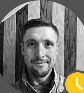

In [15]:
me

In [16]:
me.access

'org'

In [17]:
me.role

'org_admin'

In [18]:
me.created

1529342911000

### Get info about Feature Services

In [19]:
fs_srch = online_gis.content.search(query="*", 
                                    item_type="Feature Service", 
                                    max_items=25)
fs_srch

[<Item title:"Drone_Projects" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"HOA Emergency Preparedness Survey_fieldworker" type:Feature Layer Collection owner:ahenry@esridenver>,
 <Item title:"SDWQ_Merge" type:Feature Layer Collection owner:jen_mccall>,
 <Item title:"PublicProjectIdeas_dashboard" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"IncidentLocations" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"John_Snow" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"BikeLaneInv" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"AnimalProblemReports" type:Feature Layer Collection owner:hmiller_esridenver>,
 <Item title:"assignments_701e5d2853d244c3ae59a55eb7e8db34" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"UtilityProblemReports" type:Feature Layer Collection owner:hmiller_esridenver>,
 <Item title:"dispatcher

In [37]:
fs_srch_mine = online_gis.content.search(query="* AND NOT owner:*esri*", item_type="Feature Service", max_items=25)


In [38]:
fs_srch_mine

[<Item title:"Drone_Projects" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"HOA Emergency Preparedness Survey_fieldworker" type:Feature Layer Collection owner:ahenry@esridenver>,
 <Item title:"SDWQ_Merge" type:Feature Layer Collection owner:jen_mccall>,
 <Item title:"PublicProjectIdeas_dashboard" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"IncidentLocations" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"John_Snow" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"BikeLaneInv" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"AnimalProblemReports" type:Feature Layer Collection owner:hmiller_esridenver>,
 <Item title:"assignments_701e5d2853d244c3ae59a55eb7e8db34" type:Feature Layer Collection owner:joseph_peters@esridenver>,
 <Item title:"UtilityProblemReports" type:Feature Layer Collection owner:hmiller_esridenver>,
 <Item title:"dispatcher

In [23]:
wb_srch = online_gis.content.search(query="*", item_type="Web Map", max_items=25)

In [24]:
wb_srch

[<Item title:"Restaurant Inspection Results" type:Web Map owner:joseph_peters@esridenver>,
 <Item title:"Houston Evacuation Map" type:Web Map owner:ahenry@esridenver>,
 <Item title:"NOLA_PublicHealthClinics" type:Web Map owner:ShelbyHines_esridenver>,
 <Item title:"Fire Pre-Incident Plans Map JP Copy" type:Web Map owner:joseph_peters@esridenver>,
 <Item title:"Fire Hydrant Inspection" type:Web Map owner:joseph_peters@esridenver>,
 <Item title:"Restaurant Inspections Dashboard" type:Web Map owner:joseph_peters@esridenver>,
 <Item title:"Damage Assessment - High Accuracy" type:Web Map owner:mbullock@EsriDenver>,
 <Item title:"Rocktober" type:Web Map owner:jlindemann@EsriDenver>,
 <Item title:"Drone Project Inventory Map" type:Web Map owner:joseph_peters@esridenver>,
 <Item title:"Routing Testing" type:Web Map owner:joseph_peters@esridenver>,
 <Item title:"Fire Inspection_workers" type:Web Map owner:joseph_peters@esridenver>,
 <Item title:"Mosquito Spray Areas" type:Web Map owner:ShelbyHi

In [31]:
wb_srch_mine = online_gis.content.search(query="* owner:pgamberg@EsriDenver", 
                                         item_type="Web Map", 
                                         max_items=25)

In [32]:
wb_srch_mine

[<Item title:"Redlands Earthquake Response" type:Web Map owner:pgamberg@EsriDenver>,
 <Item title:"Tobacco retail analysis" type:Web Map owner:pgamberg@EsriDenver>,
 <Item title:"Collect new locations" type:Web Map owner:pgamberg@EsriDenver>,
 <Item title:"Denver schools and parks" type:Web Map owner:pgamberg@EsriDenver>,
 <Item title:"Esri Parcels" type:Web Map owner:pgamberg@EsriDenver>]

In [36]:
from arcgis.mapping import WebMap
wm = WebMap(wb_srch_mine[1])
wm

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))